# NFL Player Analysis
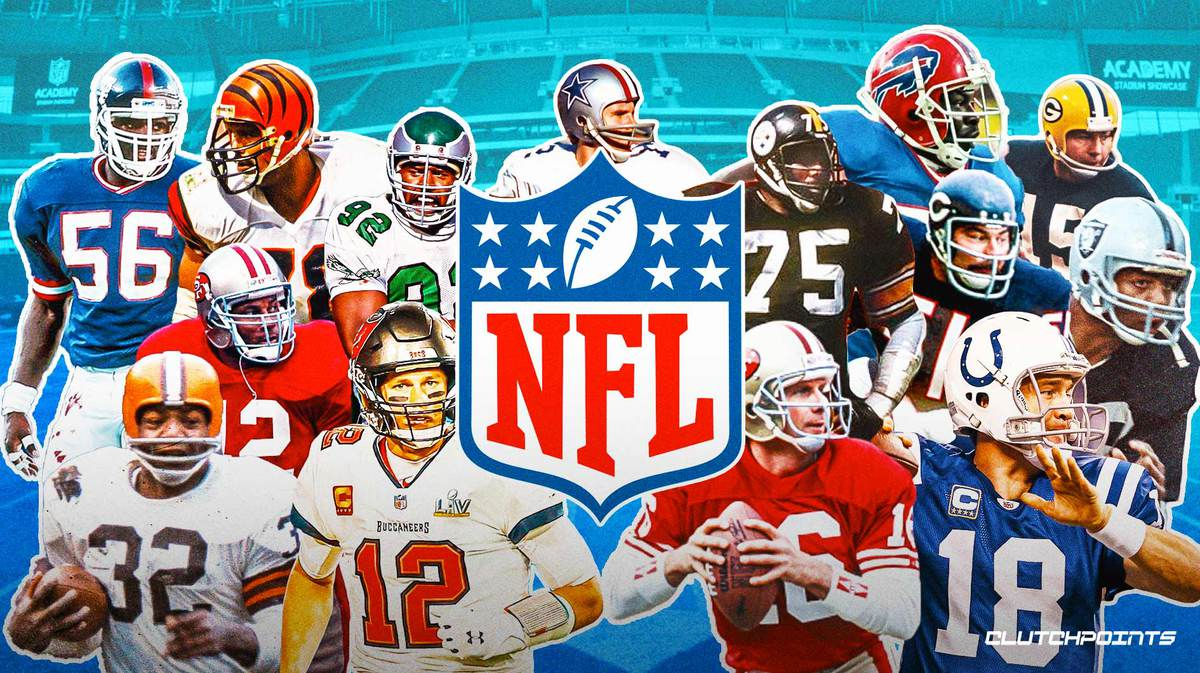

By: Daniel Sontag

## Overview
Utilizing data from Pro Football Focus (https://www.pff.com/), I performed NFL player analysis and trends over data for the last 10 years. This analysis will be performed across six drastically different position - Quarterback, Running Back, Tackle, Cornerback, Linebacker and Defensive End. I'll use statisical analysis in an attempt to located the age of maximum performance across all six positions. Additionally, I'll look at which colleges are producing the largest number of NFL caliber players at each position. 

In [132]:
import json
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

### Notes:  
While investigating the Pro Football Focus website, I was able to locate the API populating the data located here (https://www.pff.com/nfl/grades/position/qb). The API data was in JSON format and I was able to manipulate the web address to pull back multiple years and NFL positions. I created a JSON dictionary for each position with data for the last 10 years and stored them in separate .JSON files within my project folder. In the code below, I loop through each JSON file and pull out the player data while adding the year to each line of data. I store all of this data in separate DataFrames for each position. 

In [4]:
QBJSONData = open('QB_JSON_DATA.json')
QBdata = json.load(QBJSONData)
QBdf = pd.DataFrame()
for year in range (2012, 2022):
    QB = QBdata[str(year) + '_players']
    QB = pd.DataFrame(QB)
    QB['Year'] = year
    QBdf = pd.concat([QBdf, QB], axis=0)

RBJSONData = open('RB_JSON_DATA.json')
RBdata = ajson.load(RBJSONData)
RBdf = pd.DataFrame()
for year in range (2012, 2022):
    RB = RBdata[str(year) + '_players']
    RB = pd.DataFrame(RB)
    RB['Year'] = year
    RBdf = pd.concat([RBdf, RB], axis=0)

TACKLEJSONData = open('TACKLE_JSON_DATA.json')
TACKLEdata = json.load(TACKLEJSONData)
TACKLEdf = pd.DataFrame()
for year in range (2012, 2022):
    TACKLE = TACKLEdata[str(year) + '_players']
    TACKLE = pd.DataFrame(TACKLE)
    TACKLE['Year'] = year
    TACKLEdf = pd.concat([TACKLEdf, TACKLE], axis=0)

EDGEJSONData = open('EDGE_JSON_DATA.json')
EDGEdata = json.load(EDGEJSONData)
EDGEdf = pd.DataFrame()
for year in range (2012, 2022):
    EDGE = EDGEdata[str(year) + '_players']
    EDGE = pd.DataFrame(EDGE)
    EDGE['Year'] = year
    EDGEdf = pd.concat([EDGEdf, EDGE], axis=0)

LBJSONData = open('LB_JSON_DATA.json')
LBdata = json.load(LBJSONData)
LBdf = pd.DataFrame()
for year in range (2012, 2022):
    LB = LBdata[str(year) + '_players']
    LB = pd.DataFrame(LB)
    LB['Year'] = year
    LBdf = pd.concat([LBdf, LB], axis=0)

CBJSONData = open('CB_JSON_DATA.json')
CBdata = json.load(CBJSONData)
CBdf = pd.DataFrame()
for year in range (2012, 2022):
    CB = CBdata[str(year) + '_players']
    CB = pd.DataFrame(CB)
    CB['Year'] = year
    CBdf = pd.concat([CBdf, CB], axis=0)

### Notes:  
In the next two codeblocks, I clean the data by removing any player that doesn't include an age and set a minimum of 300 snaps that a player must play for their data to be included. This minimum snap count helps remove anomalies for players that didn't see significant playing time throughout the year. Lastly, the data provided by Football Focus has the current age of the players for each season. With each season ending approximately around the end of the year (example last regular season game of 2021 ended on 12/26/2021), I took their current age and subtracted the difference from current year minus year of season played.  

In [20]:
Offense_df = pd.concat([QBdf, RBdf, TACKLEdf], axis=0)
Offense_df = Offense_df.loc[(Offense_df['age'] != "")]
Offense_df = Offense_df[Offense_df['offense_snaps'] > 300]
Offense_df['age'] = pd.to_numeric(Offense_df['age'])
today = dt.date.today()
Offense_df['age'] = round(Offense_df['age'] - (today.year - Offense_df['Year'] - today.month/12), 1)
Offense_df = Offense_df[['name', 'grade_position', 'offense', 'age', 'height', 'weight', 'college', 'Year']].reset_index(drop = True)
Offense_df = Offense_df.rename(columns={'name': 'Name', 'grade_position': 'Position', 'offense': 'Grade', 'age':'Age', 'height': 'Height', 'weight': 'Weight', 'college': 'College'})
Offense_df.loc[Offense_df['Position'] == 'T', 'Position'] = 'Tackle' 
Offense_df.loc[Offense_df['Position'] == 'QB', 'Position'] = 'Quarterback'
Offense_df.loc[Offense_df['Position'] == 'HB', 'Position'] = 'RunningBack'
Offense_df

,Name,Position,Grade,Age,Height,Weight,College,Year
0,Carson Palmer,Quarterback,65.7,33.1,605.0,230.0,USC,2012
1,Tony Romo,Quarterback,73.9,32.8,602.0,219.0,E ILLINOIS,2012
2,Eli Manning,Quarterback,78.7,32.1,605.0,220.0,OLE MISS,2012
3,Philip Rivers,Quarterback,64.1,31.1,605.0,228.0,NC STATE,2012
4,Ben Roethlisberger,Quarterback,86.2,30.9,605.0,240.0,MIAMI OH,2012
...,...,...,...,...,...,...,...,...
1707,Donovan Smith,Tackle,80.5,28.6,606.0,338.0,PENN STATE,2021
1708,Rob Havenstein,Tackle,83.4,29.7,608.0,330.0,WISCONSIN,2021
1709,Trent Brown,Tackle,73.8,28.8,608.0,380.0,FLORIDA,2021
1710,La'el Collins,Tackle,80.2,28.5,604.0,320.0,LSU,2021


In [24]:
Defense_df = pd.concat([EDGEdf, LBdf, CBdf], axis=0)
Defense_df = Defense_df.loc[(Defense_df['age'] != "")]
Defense_df = Defense_df[Defense_df['defense_snaps'] > 300]
Defense_df['age'] = pd.to_numeric(Defense_df['age'])
Defense_df['age'] = pd.to_numeric(Defense_df['age'])
today = dt.date.today()
Defense_df['age'] = round(Defense_df['age'] - (today.year - Defense_df['Year'] - today.month/12), 1)
Defense_df = Defense_df[['name', 'grade_position', 'defense', 'age', 'height', 'weight', 'college', 'Year']].reset_index(drop = True) 
Defense_df = Defense_df.rename(columns={'name': 'Name', 'grade_position': 'Position', 'defense': 'Grade', 'age':'Age', 'height': 'Height', 'weight': 'Weight', 'college': 'College'})
Defense_df.loc[Defense_df['Position'] == 'LB', 'Position'] = 'Linebacker'
Defense_df.loc[Defense_df['Position'] == 'ED', 'Position'] = 'DefensiveEnd'
Defense_df.loc[Defense_df['Position'] == 'CB', 'Position'] = 'Cornerback'
Defense_df

,Name,Position,Grade,Age,Height,Weight,College,Year
0,Julius Peppers,DefensiveEnd,74.5,33.0,607,295,N CAROLINA,2012
1,Dwight Freeney,DefensiveEnd,70.3,32.9,601,268,SYRACUSE,2012
2,Bryan Thomas,DefensiveEnd,70.1,33.6,604,266,UAB,2012
3,James Harrison,DefensiveEnd,68.7,34.7,601,242,KENT STATE,2012
4,Terrell Suggs,DefensiveEnd,61.7,30.3,603,265,ARIZONA ST,2012
...,...,...,...,...,...,...,...,...
3076,Ronald Darby,Cornerback,61.1,28.1,511,193,FLORIDA ST,2021
3077,Steven Nelson,Cornerback,63.6,29.0,511,194,OREGON ST,2021
3078,Troy Hill,Cornerback,60.1,30.4,511,183,OREGON,2021
3079,Brandin Echols,Cornerback,45.0,24.3,511,178,KENTUCKY,2021


### Notes:  
Now that both my Offense and Defense DataFrames have similar columns, I concatenate them into one DataFrame to perform my overall analysis.

In [23]:
Player_df = pd.concat([Defense_df, Offense_df], axis=0).reset_index(drop = True) 
Player_df

,Name,Position,Grade,Age,Height,Weight,College,Year
0,Julius Peppers,DefensiveEnd,74.5,33.0,607.0,295.0,N CAROLINA,2012
1,Dwight Freeney,DefensiveEnd,70.3,32.9,601.0,268.0,SYRACUSE,2012
2,Bryan Thomas,DefensiveEnd,70.1,33.6,604.0,266.0,UAB,2012
3,James Harrison,DefensiveEnd,68.7,34.7,601.0,242.0,KENT STATE,2012
4,Terrell Suggs,DefensiveEnd,61.7,30.3,603.0,265.0,ARIZONA ST,2012
...,...,...,...,...,...,...,...,...
4788,Donovan Smith,Tackle,80.5,28.6,606.0,338.0,PENN STATE,2021
4789,Rob Havenstein,Tackle,83.4,29.7,608.0,330.0,WISCONSIN,2021
4790,Trent Brown,Tackle,73.8,28.8,608.0,380.0,FLORIDA,2021
4791,La'el Collins,Tackle,80.2,28.5,604.0,320.0,LSU,2021


### Prime Age Analysis

### Notes:  
With the assumption that NFL players' career performance is generally a bell curve, I'm attempting to find their peak performance year and their corresponding age. Since my data is spanning 2012 - 2021, if their peak performance was in 2021 or 2012 I'm filtering out this data. If their peak performance was in 2012, they might already be on the decline and their maximum performance was prior to 2012. Alternatively, if their peak performance was from 2021 they could still be ascending and not reached their full potential. Lastly, I wanted players that played a minimum of 3 years to see an overall trajectory of their career.  

I used my previous knowledge of SQL and the pandasql package to manipulate the DataFrame

In [97]:
Player_Max_df = ps.sqldf("Select Distinct Name, max(Grade), Position, Age, Year, count(Name) from Player_df group by Name having count(Name) > 2")
Player_Max_df = ps.sqldf("Select *, case when year in (2021, 2012) then 'No' else 'Yes' end Max_Year from Player_Max_df")
Player_Max_df = ps.sqldf("Select * from Player_Max_df where Max_Year = 'Yes'")
Player_Max_df

Mean_MaxAge_df = Player_Max_df.groupby('Position')['Age'].mean().sort_values(ascending=False)
round(Mean_MaxAge_df,2)

Position
Quarterback     29.51
DefensiveEnd    27.62
Tackle          27.50
Cornerback      26.34
Linebacker      26.22
RunningBack     25.95
Name: Age, dtype: float64

Text(0.5, 1.0, 'Prime Age by Position')

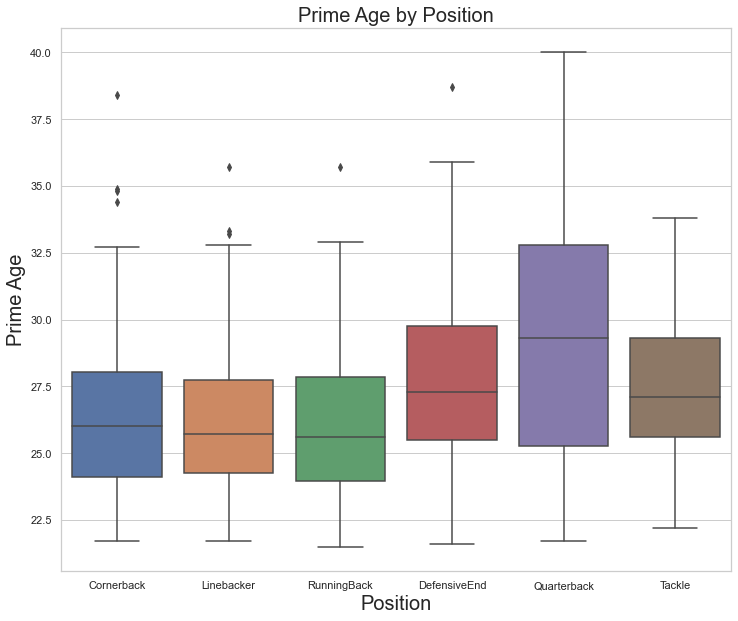

In [162]:
# bp = Player_Max_df.boxplot(by = 'Position', column=['Age'],  grid= False, figsize=(12, 10), showfliers = True)
# plt.title("Prime Age by Position", size=25)
# plt.xlabel('Position', size=20)
# plt.ylabel('Prime Age', size=20)
# plt.show()

plt.figure(figsize=(12,10))
b = sns.boxplot(x=Player_Max_df['Position'], y=Player_Max_df['Age'])
b.set_xlabel("Position",fontsize=20)
b.set_ylabel("Prime Age",fontsize=20)
b.axes.set_title("Prime Age by Position",fontsize=20)

### Notes:
From the boxplot, it appears there is a large correlation between the three skills positions of Running Back, Cornerback and Linebacker. These positions have a much larger emphasis on speed. Alternatively, there appears to be a correlation between the positions of Tackle and Defensive End. While speed is significant at these positions, power and strength are arguably superior. No position appears to correlate with Quarterback with them hitting their prime performance much later into their career. The quarterback position has a larger mental learning curve and takes many years for them to acclimate from college to pro. Additionally, recent rules changes over the last decade have been implemented to protect the health of this vital position which could be extending their careers.

### Alma Mater Analysis

### Notes:
Below I will be performing an analysis by looking at the alma mater of the players from the last 10 years of data to see if certain universities are producing NFL caliber players at a high rate. The previous filter of a minimum of 300 snaps played in a season is applied to the DataFrame in an effort to return only players with significant playing time.

In [10]:
College_df = Player_df[['Name', 'Position', 'College', 'Year']]
# Max year to remove duplicates and get the last year that an individual played
College_df = Player_df.groupby(['Name', 'College', 'Position'])['Year'].max()
College_Position_df = College_df.groupby(['College', 'Position']).count()
College_Position_df.sort_values(ascending=False).head(20)

College     Position    
LSU         Cornerback      12
FLORIDA ST  Cornerback      11
USC         DefensiveEnd    11
GEORGIA     DefensiveEnd    11
FLORIDA     Cornerback      10
LSU         Linebacker      10
ALABAMA     Cornerback      10
TEXAS       Cornerback      10
ALABAMA     Linebacker      10
MIAMI FL    Linebacker      10
OHIO STATE  Cornerback       9
ALABAMA     RunningBack      9
MIAMI FL    DefensiveEnd     9
OHIO STATE  DefensiveEnd     9
            Linebacker       9
WASHINGTON  Cornerback       9
S CAROLINA  Cornerback       8
CLEMSON     Cornerback       8
MICHIGAN    DefensiveEnd     8
USC         Linebacker       8
Name: Year, dtype: int64

### Notes:
Listed above is a ranking of the most players developed by a University at each position. Louisiana State University seems to have the greatest pedigree for Cornerbacks comparative to all other Universities and positions. To get a full breakdown I have plotted each position below with the highest cumulative counts by University. 

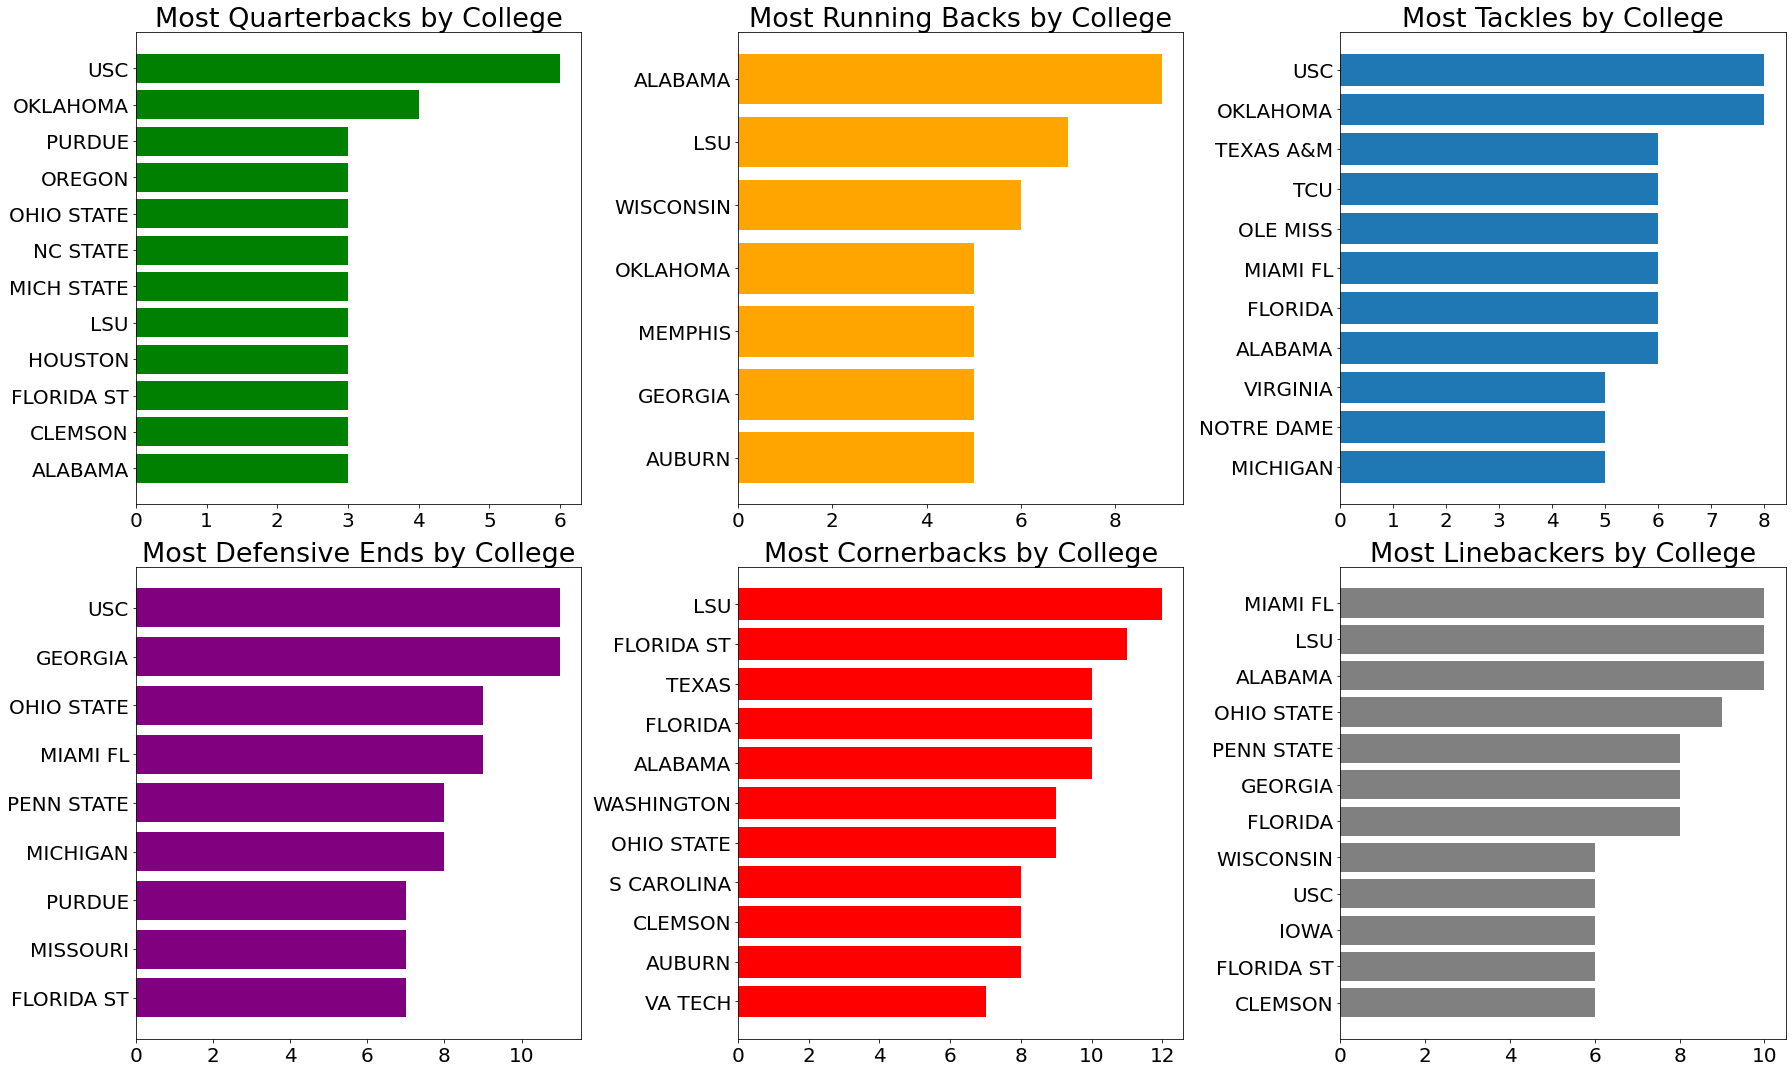

In [11]:
College_df = Player_df[['Name', 'Position', 'College', 'Year']]
College_df = ps.sqldf("Select distinct Name, Position, College from College_df group by Name")
CB_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'Cornerback' group by College, Position having count(Position) > 6 order by count(Position)")
LB_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'Linebacker' group by College, Position having count(Position) > 5 order by count(Position)")
DE_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'DefensiveEnd' group by College, Position having count(Position) > 6 order by count(Position)")
QB_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'Quarterback' group by College, Position having count(Position) > 2 order by count(Position)")
RB_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'RunningBack' group by College, Position having count(Position) > 4 order by count(Position)")
T_df = ps.sqldf("Select College, Position, count(Position) from College_df where Position = 'Tackle' group by College, Position having count(Position) > 4 order by count(Position)")
# T_df.plot(kind = 'bar', x = 'College', y = 'count(Position)')
# plt.show()
plt.figure(figsize = (25, 15))
plt.subplot(231)
plt.barh(QB_df['College'], QB_df['count(Position)'], color='green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Quarterbacks by College', fontsize=27)

plt.subplot(232)
plt.barh(RB_df['College'], RB_df['count(Position)'], color='orange')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Running Backs by College', fontsize=27)

plt.subplot(233)
plt.barh(T_df['College'], T_df['count(Position)'])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Tackles by College', fontsize=27)

plt.subplot(234)
plt.barh(DE_df['College'], DE_df['count(Position)'], color='Purple')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Defensive Ends by College', fontsize=27)

plt.subplot(235)
plt.barh(CB_df['College'], CB_df['count(Position)'], color='Red')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Cornerbacks by College', fontsize=27)

plt.subplot(236)
plt.barh(LB_df['College'], LB_df['count(Position)'], color='Grey')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Most Linebackers by College', fontsize=27)


plt.tight_layout()
plt.show()


### Height / Weight Comparison
### Notes:
During the NFL combine process, there is much conversation around player attributes and measureables. I wanted to run analysis on a couple of these discussed traits to see if there actually is a correlation to player performance. One measureable that often is a topic of discussion is the height of a Quarterback with the assumption that taller Quarterbacks have a better chance to success. Next, I wanted to test if heavier offensive tackles correlates to higher performance figures over the span of their career.

In [134]:
Metrics_df = Player_df[['Position', 'Grade', 'Height', 'Weight']]
QB_height_df = Metrics_df[['Position', 'Grade', 'Height']]
QB_height_df = QB_height_df.loc[(Metrics_df['Position'] == 'Quarterback')]
QB_height = QB_height_df.groupby('Height')
QB_height.describe()

Grade                                                        
       count       mean        std   min     25%   50%     75%   max
Height                                                              
510.0    3.0  76.633333  10.767699  64.2  73.500  82.8  82.850  82.9
511.0   10.0  83.840000   6.638641  73.9  79.525  83.8  90.100  91.9
600.0   14.0  76.007143  14.851079  53.3  61.050  83.7  88.525  94.0
601.0   25.0  67.536000   9.544539  45.8  59.800  68.3  74.800  85.7
602.0   79.0  72.098734  11.623534  46.0  64.300  72.7  80.650  95.1
603.0   65.0  69.243077  12.005090  48.4  59.300  67.9  80.100  92.9
604.0   93.0  71.441935  13.637698  37.2  62.400  72.4  80.900  94.9
605.0   72.0  71.588889  11.456956  35.1  65.150  70.8  78.950  92.9
606.0   25.0  66.916000  11.048027  30.0  61.900  66.5  73.300  90.1
607.0    4.0  53.925000   7.114481  47.3  50.600  52.2  55.525  64.0

<AxesSubplot:title={'center':'Quarterback Grades by Height'}, xlabel='Height', ylabel='Grade'>

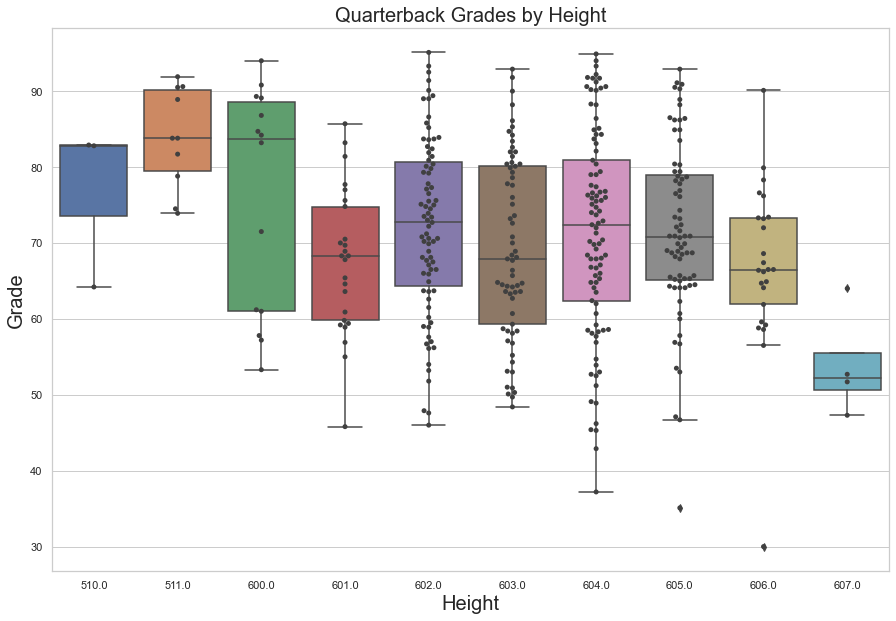

In [159]:
# bp = QB_height_df.boxplot(by = 'Height', column=['Grade'],  grid= False, figsize=(12, 10), showfliers = True)
# plt.title("Quarterback Grade by Height", size=25)
# plt.xlabel('Height', size=20)
# plt.ylabel('Quarterback Grade', size=20)
# plt.show()

plt.figure(figsize=(15,10))
p = sns.boxplot(x=QB_height_df['Height'], y=QB_height_df['Grade'])
p.set_xlabel("X Label",fontsize=20)
p.set_ylabel("Y Label",fontsize=20)
p.axes.set_title("Quarterback Grades by Height",fontsize=20)
sns.swarmplot(x=QB_height_df['Height'], y=QB_height_df['Grade'],color=".25")